In [1]:
%matplotlib inline
from __future__ import print_function
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import os, argparse, sys
# import multiprocessing
import numpy as np

Dataset size: 107 107
Shape: (720, 1280)


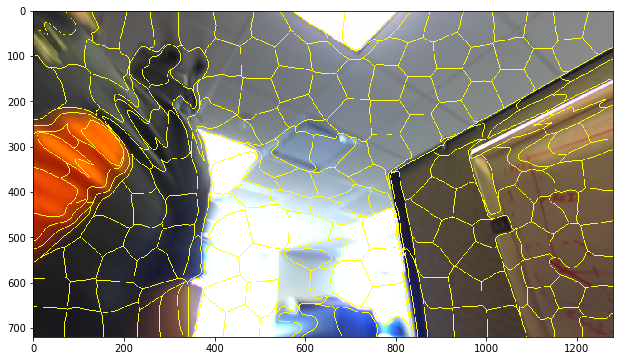

In [2]:
def ex_slic(fname='../../../img/pexels-photo.jpg', numSegments=200):
    image = img_as_float(io.imread(fname))
    segments = slic(image, n_segments = numSegments, sigma = 5)
    print('Shape:', segments.shape)

    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(12,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    # plt.axis("off")
    plt.show()
    
DATA = lambda p: os.path.join('../datafiles', p)
images = list()
depth = list()

for root, dirs, files in os.walk(DATA('zed-subset')):
    for name in files:
        if os.path.splitext(name)[1] in ['.jpeg']:
            fname = os.path.join(root, name)
            if 'depth' in name:
                depth.append(fname)
            else:
                images.append(fname)

print('Dataset size:', len(images), len(depth))
ex_slic(images[2]) 

In [3]:
def gen_slic(fnames, numSegments, output_path):
    """Run SLIC on a batch of images and store the segmentations in a directory"""
    print('Output path', output_path)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for fname in fnames:
        try:
            im = img_as_float(io.imread(fname))
            segments = slic(im, n_segments = numSegments, sigma = 5)
            np.save(os.path.join(output_path, os.path.basename(fname)), segments, allow_pickle=False)
            print('.', end='')
        except Exception as e:
            print(fname, e)

gen_slic(images, 200, os.path.join(DATA('zed-subset'), 'SLIC200'))

Output path ../datafiles/zed-subset/SLIC200
...........................................................................................................